In [1]:
import pandas as pd
import numpy as np


# Read the file

In [2]:
df=pd.read_csv(r'C:\Users\Gaurav Singh\Downloads\insurance.csv')

We get the top 5 values by this.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We get bottom 5 values by this.

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Info use

By the help of info we get information about columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.shape

(1338, 7)

Describe the data and it give mean standerd daviation and all

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Using df.dtypes it shows the columns data types which is in int,flot or object

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking Missing Values

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

if we have any columns which has object data type then we use labelencoder. With the help of labelencoder we change the data into int.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
df['sex']=le.fit_transform(df['sex'])

In [13]:
df['smoker']=df['smoker'].astype('str')

In [14]:
df['smoker']=le.fit_transform(df['smoker'])

In [15]:
df['region']=le.fit_transform(df['region'])

# Correlation

Correlation gives the relation between multiple columns its range is 0 to 1

In [16]:
corr=df.corr()

In [17]:
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Import Matplotlib and seaborn for vissualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

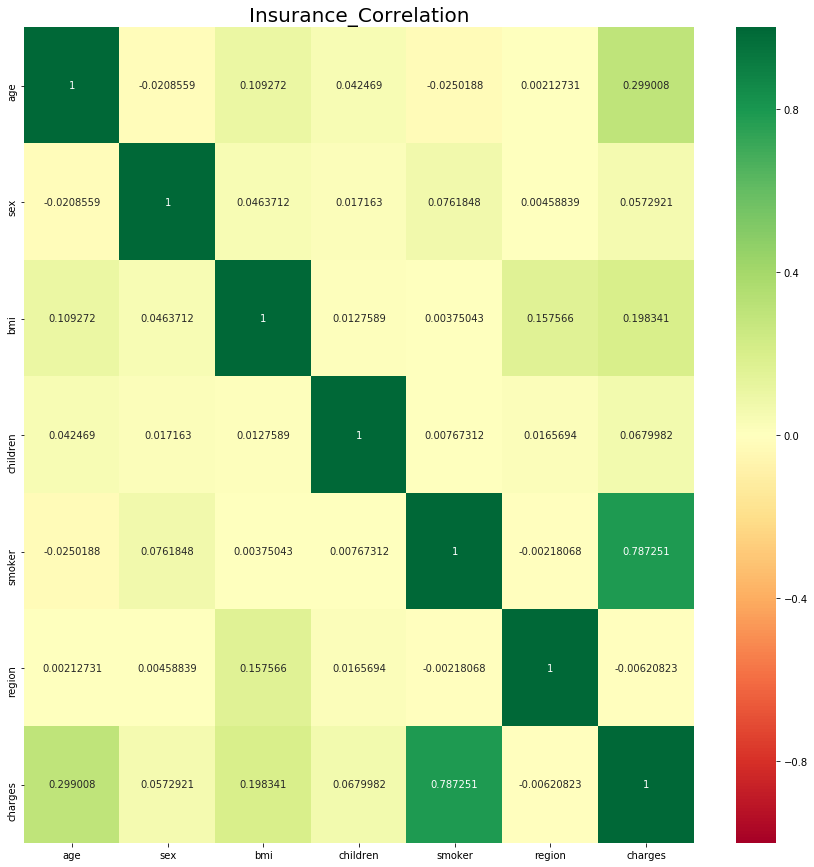

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=+1,vmin=-1,fmt='g',cmap='RdYlGn',annot=True)
plt.title('Insurance_Correlation',fontsize=20)
plt.show()

The Follwing table defins the corelation amongust the attributes of the table. More data insights are explaing as per the Heatmap

In [20]:
b=df.corr()
b

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [21]:
a1=b[['charges']]
a1

,charges
age,0.299008
sex,0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
region,-0.006208
charges,1.000000


This heatmap shows the charges claim by smoker is maximum. And it shwos that the sex is not a factor regarding the charges. BMI shows that it is not a factor regarding to smoking.

Attributes sex and the children are at the leat side of the graph. It have the 0.5% and 0.6% respective affect on the insurance charges. 

The age and the bmi factor has 29 and 19 percentage claim on the charges, which is considered to be the moderate.


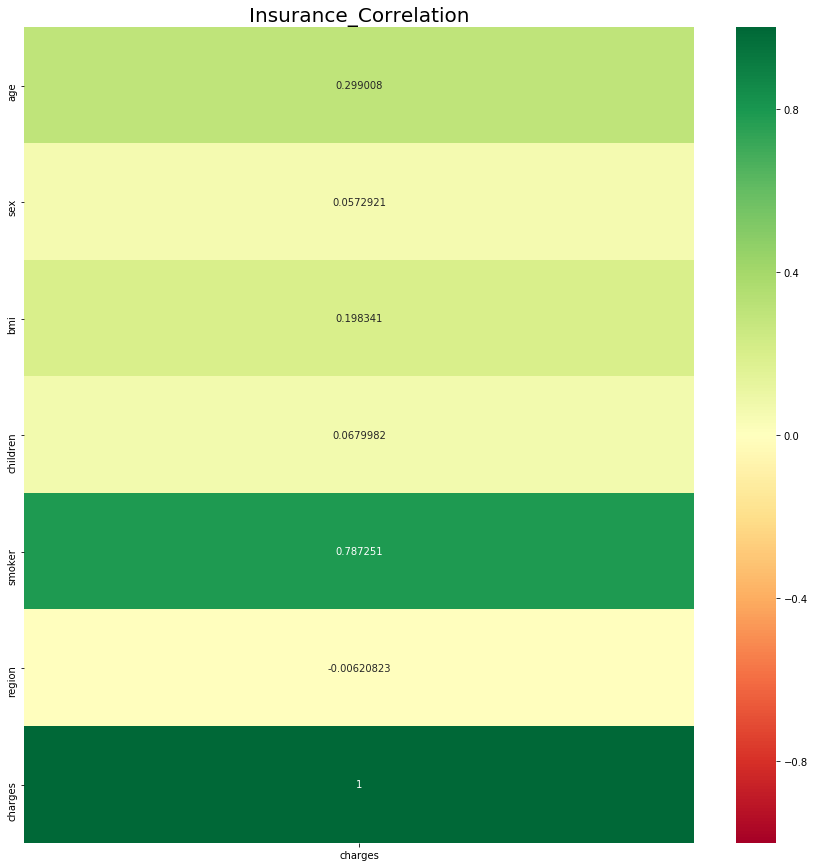

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(a1,vmax=+1,vmin=-1,fmt='g',cmap='RdYlGn',annot=True)
plt.title('Insurance_Correlation',fontsize=20)
plt.show()

# Skewness

Skewness shows where the feels the comfort most.

In [24]:
sk=df.skew()

In [25]:
print(sk)

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64


Charges distplot shows the maximum values in between 0 to 1000

Distplot shows the variation in the data distribution all below graphs shows thats if insides of the data gives the left peak with right tail then it shows us the mentioned data has positive values and if the insides has right peak with left tail then data has negative values as show.

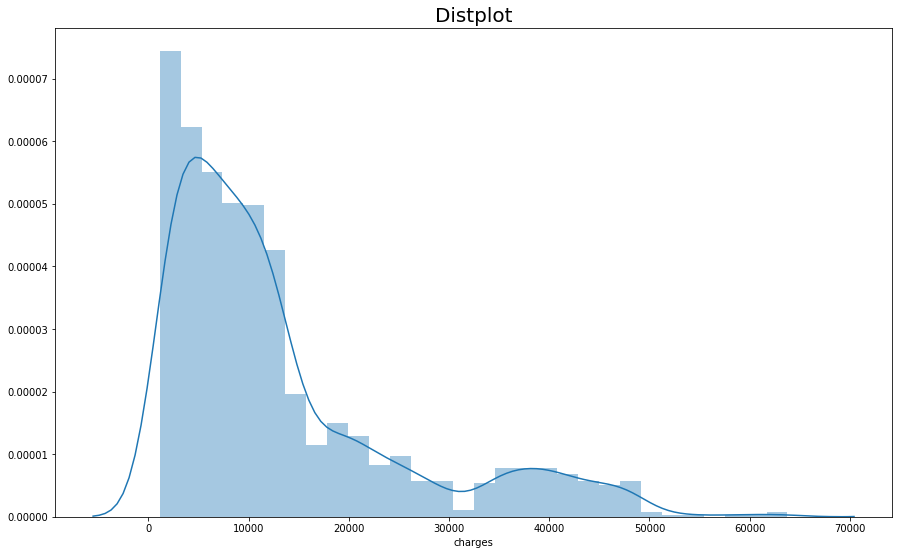

In [26]:
plt.figure(figsize=(15,9))
sns.distplot(df['charges'])
plt.title('Distplot',fontsize=20)
plt.show()

# Displot

Text(0.5, 1.0, 'Displot')

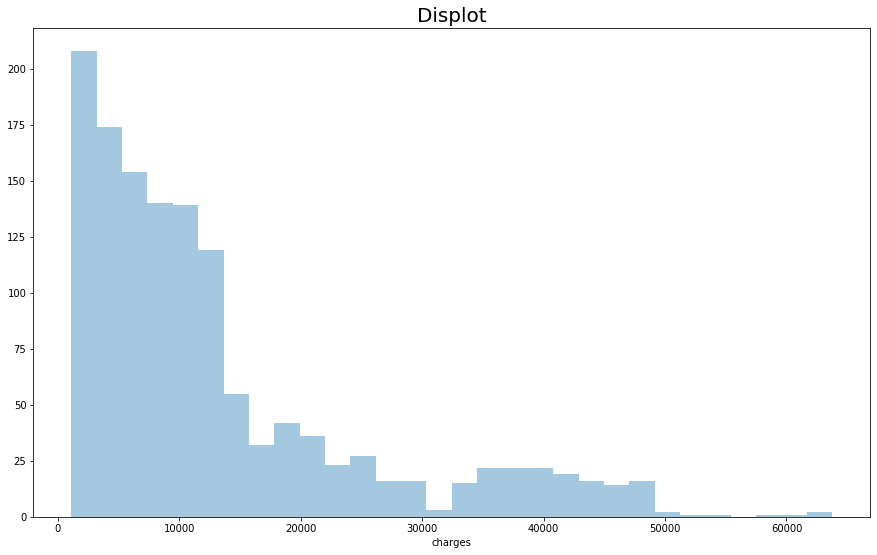

In [27]:
plt.figure(figsize=(15,9))
sns.distplot(df['charges'],kde=False)
plt.title('Displot',fontsize=20)

All columns Distplot are below

This distplot show the maximum age lies between 20 to 60

Peak of the graph is towards left, which shows a positive Skewness. The inclination of the data is more towards 20 to 25, i.e. data values or rows are more towards 20 to 25.

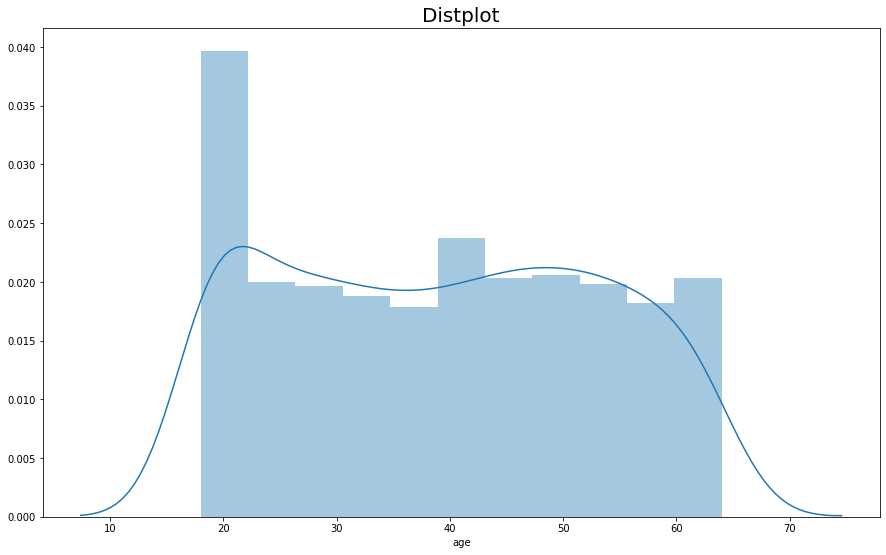

In [28]:
plt.figure(figsize=(15,9))
sns.distplot(df['age'])
plt.title('Distplot',fontsize=20)
plt.show()

The peak of the graph is distributed on the right and left peak. But the data is now not normalized as it’s the slightly more towards the left side; which shows the positive values are more than the negative. 

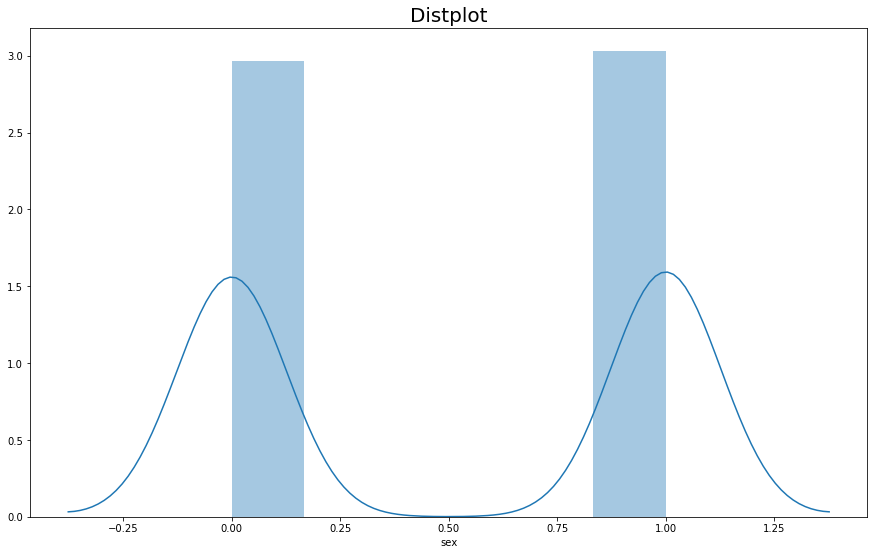

In [29]:
plt.figure(figsize=(15,9))
sns.distplot(df['sex'])
plt.title('Distplot',fontsize=20)
plt.show()

The Peak of the graph is left head and right tail which shows the positive data. The data/rows are more towards the 20 to 40.

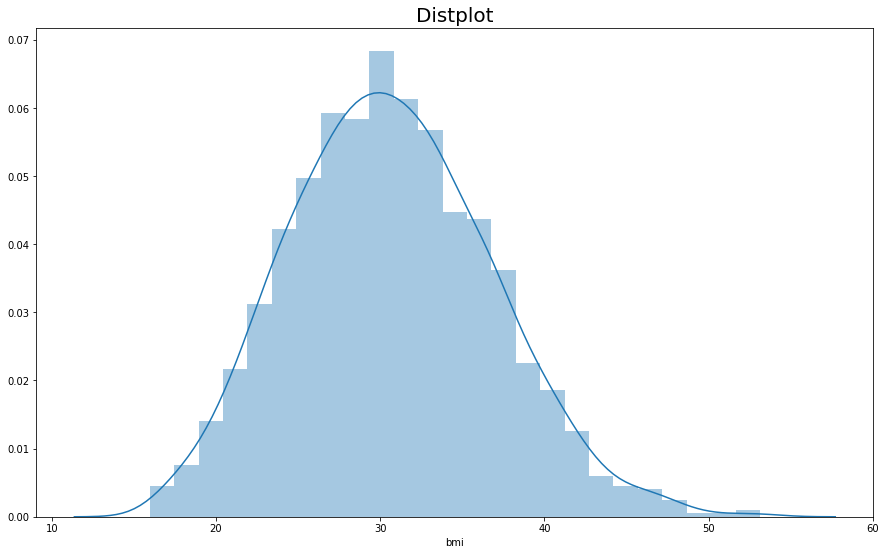

In [30]:
plt.figure(figsize=(15,9))
sns.distplot(df['bmi'])
plt.title('Distplot',fontsize=20)
plt.show()

The graph shows the peak as left head and right tail. The values are getting lesser as the age number of having child is more. The high values are with 0 numbers of children. 

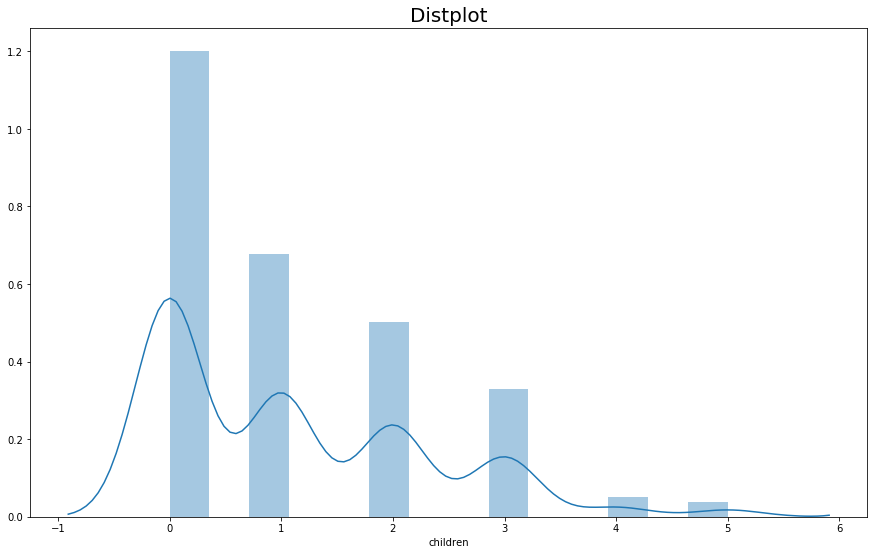

In [31]:
plt.figure(figsize=(15,9))
sns.distplot(df['children'])
plt.title('Distplot',fontsize=20)
plt.show()

The graph is representing the left peak on the high and right on the lower side. This is demonstrates the positive inclination. As the yes and no is represented in positive and negative numbers respectively. 
The non-smokers data is more than the smokers. 



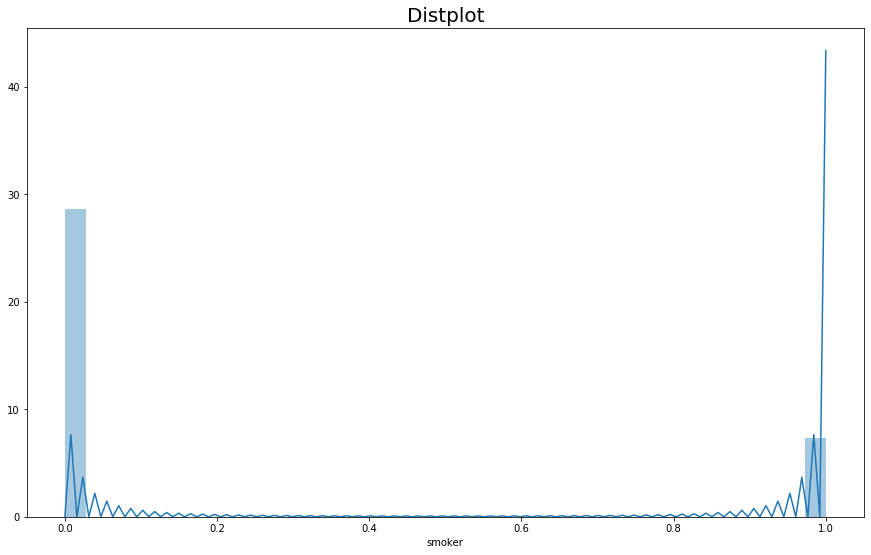

In [32]:
plt.figure(figsize=(15,9))
sns.distplot(df['smoker'])
plt.title('Distplot',fontsize=20)
plt.show()

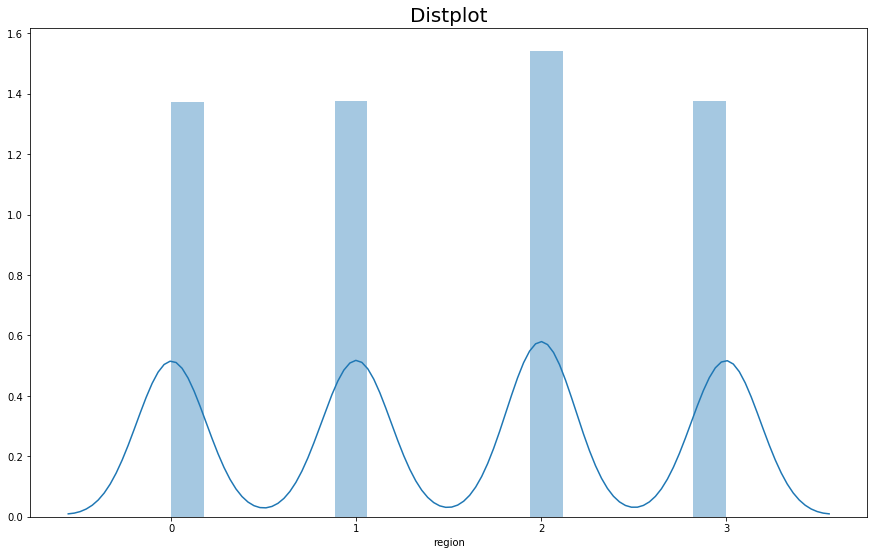

In [33]:
plt.figure(figsize=(15,9))
sns.distplot(df['region'])
plt.title('Distplot',fontsize=20)
plt.show()

# Boxplot

Boxplot data shows the summery of data set of values having properties like minimum , maximum , first quartile and median.

In this charges boxplot there are so many outliers it affect the data.

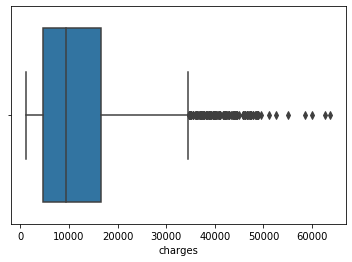

In [34]:
sns.boxplot(df.charges)

The box plot represents the data of the age attribute. The age of values starts from 19 and goes above 60. 25 to 75% of the data/rows lies between the 25 to 52(approx) age. 

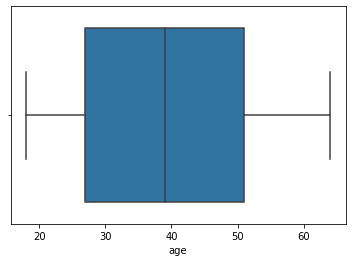

In [35]:
sns.boxplot(df.age)

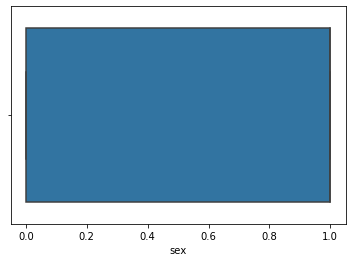

In [36]:
sns.boxplot(df.sex)

The plots shows the values available in the tables are between 15 and above 50. 25 to 75 percent of the data lies between the 25 and 35 bmi. On top of there are instances of outlies found in the data which are displayed outside of the boxplot presentation

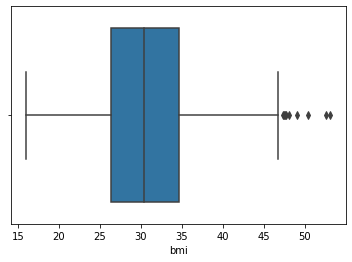

In [37]:
sns.boxplot(df.bmi)

The attribute children has the major numbers between the 0 and 2. 50 persent of the data is at the value and the 75 percent is at the 2.

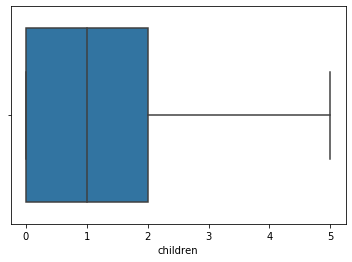

In [38]:
sns.boxplot(df.children)

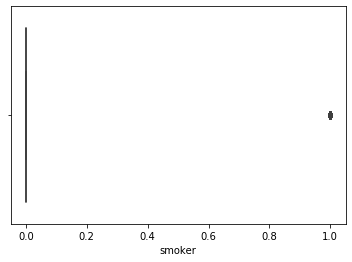

In [39]:
sns.boxplot(df.smoker)

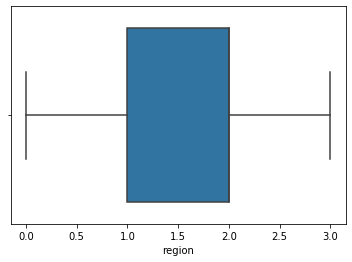

In [40]:
sns.boxplot(df.region)

# Linear Regression

In [41]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Assiend the independent columns in x variable

In [42]:
x=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [43]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


Assined the dependent columns in y variable.

In [44]:
y=df[['charges']]

Import Train test split. By this we train 70% of data and then test it with 30% of remaining data.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=1)

Importing linear regression librery from sklearn

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

Linear regression is the approximation of a linear model used to describe the relationship between two or more variables. We can use linear regression to predict a continuous value, by using other variables. In simple linear regression, there are two variables: a dependent variable and an independent variable. 

In [49]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
x_test.shape

(402, 6)

In [51]:
x_train.shape

(936, 6)

In [52]:
y_test.shape

(402, 1)

In [53]:
y_train.shape

(936, 1)

Regarding to this we train the data and test the data and then we predict what is prediction regarding to charges.

In [54]:
y_pred=model.predict(x_test)

In [55]:
y_pred

array([[ 4.50048433e+03],
       [ 1.28194579e+04],
       [ 1.23977127e+04],
       [ 1.34303433e+04],
       [ 5.31776110e+02],
       [ 3.22642696e+04],
       [ 1.30762461e+04],
       [ 1.22348298e+04],
       [ 3.82932402e+03],
       [ 3.01565286e+04],
       [ 1.13198257e+04],
       [ 1.72084618e+04],
       [ 8.91832075e+03],
       [ 8.22883518e+03],
       [ 3.58166904e+03],
       [ 1.01918742e+04],
       [ 3.97134424e+03],
       [ 6.75521017e+03],
       [ 1.52141457e+04],
       [ 1.42498228e+04],
       [ 1.24184207e+04],
       [ 3.34497470e+04],
       [ 9.12417099e+03],
       [ 8.85380484e+03],
       [ 3.13406481e+03],
       [ 8.14417612e+03],
       [ 9.33914668e+03],
       [ 1.10793027e+04],
       [ 7.54531559e+03],
       [ 4.40537383e+03],
       [ 1.39112972e+04],
       [ 5.64886526e+03],
       [ 3.46827850e+04],
       [ 2.74022377e+04],
       [ 3.38105315e+04],
       [ 9.52560370e+03],
       [ 3.06087668e+04],
       [ 2.67066855e+04],
       [ 1.5

In [56]:
model.score(x_test,y_test)*100

74.0367716897532

# R2 score

It shows how well the regression model fits the observed data.

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_test,y_pred)*100

74.0367716897532

# Adjusted r2 score

The adjusted R-squared adjusts for the number of terms in the model. Importantly, its value increases only when the new term improves the model fit more than expected by chance alone. The adjusted R-squared value actually decreases when the term doesn’t improve the model fit by a sufficient amount.



In [59]:
adj_r2_score = 1-(1-model.score(x_test,y_test))*len((y_train)-1)/(len(y_train)-y_test.shape[1]-1)
adj_r2_score

0.7398117591178693

# Mean squared error

The mean squared error (MSE) tells us how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”).

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_test,y_pred)

36794223.343517